# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

In [72]:
! git clone https://github.com/adaire2/visualization

fatal: destination path 'visualization' already exists and is not an empty directory.


**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
cc = pd.read_csv('/content/visualization/assignment/data/college_completion.csv')
cc.head() #there are 3798 rows and 63 columns ... this means there are 3798 observations and 63 variables (althought one is just an index),
#the variables include information about each college/higher ed institution including location, grad rates, and more.

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [ ]:
cc['level'].value_counts()

4-year    2339
2-year    1459
Name: level, dtype: int64

In [ ]:
pd.crosstab(cc['control'], cc['level'])
#this cross tabulation allows us to compare the level (4 year or two year) with the type of school (private for-profit, NFP, and public)
#it is interesting that there is a distinct breakdown of each length (level) and the type of school, for profit schools are almost evenly divided between
# 2 and 4 year institutions whicl private NFP schools are almost exclusively 4-year institutions. Public schools are more likely to be 2-year, but
#it is not a huge gap

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


<Axes: xlabel='grad_100_value', ylabel='Count'>

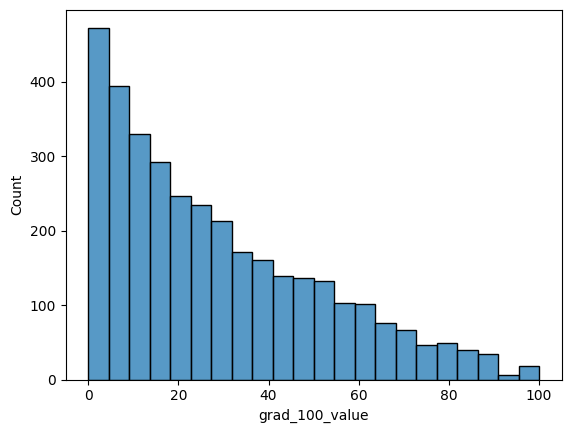

In [ ]:
sns.histplot(cc['grad_100_value'])

<Axes: ylabel='grad_100_value'>

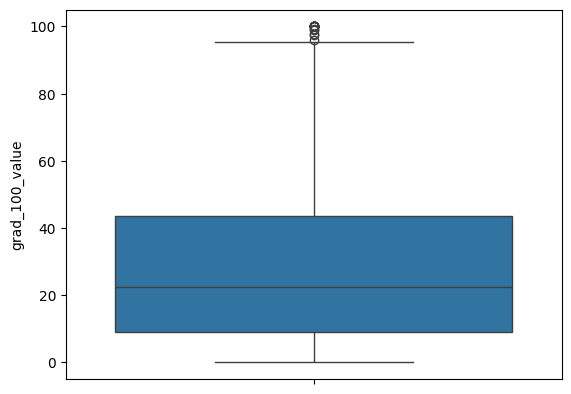

In [ ]:
sns.boxplot(cc['grad_100_value'])

<Axes: xlabel='grad_100_value', ylabel='Density'>

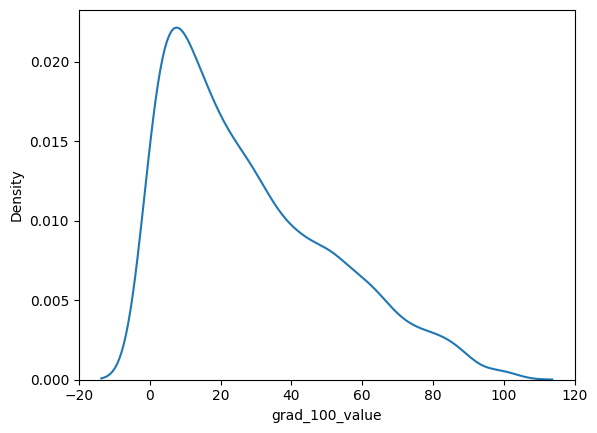

In [ ]:
sns.kdeplot(cc['grad_100_value'])

In [ ]:
cc['grad_100_value'].describe()

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

<Axes: xlabel='grad_100_value', ylabel='Density'>

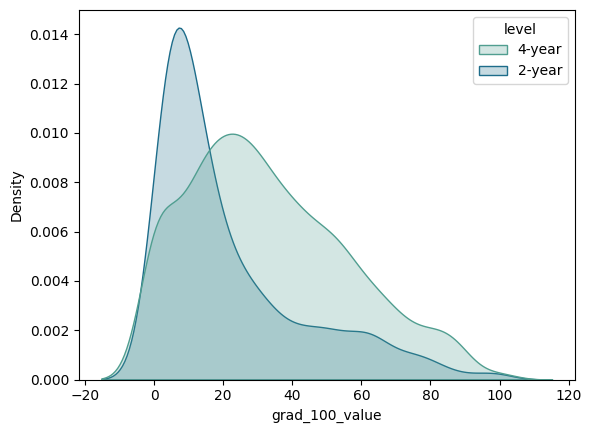

In [ ]:
sns.kdeplot(data=cc, x=cc['grad_100_value'], hue = cc['level'] , fill = True, palette = 'crest')

<Axes: xlabel='grad_100_value', ylabel='Density'>

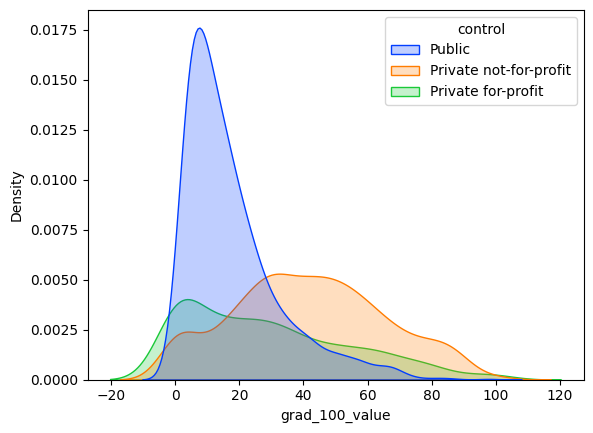

In [ ]:
sns.kdeplot(data=cc, x=cc['grad_100_value'], hue = cc['control'], fill = True, palette = 'bright')

In [ ]:
#between these two plots, it looks like public college students are much more likely to NOT graduated in the expected time while the two private types
#are much more distributed (more spread) and the students seem more likely to graduate on time, the not-for-profit schools have an even better turn-out
#the 4-year institutions are more likely to have higher graduation (on time) rates than 2-year institutions

In [ ]:
gradgroupL = cc['grad_100_value'].groupby(cc['level'])
gradgroupL.describe()
#as we saw with the kernel density plot, the 4-year institutions have higher on-time grad rates

,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
2-year,1455.0,21.636151,21.645747,0.0,6.0,13.0,30.600,100.0
4-year,2012.0,33.230119,23.270160,0.0,15.2,29.7,49.225,100.0


In [ ]:
gradgroupC = cc['grad_100_value'].groupby(cc['control'])
gradgroupC.describe()
#This data is also consident with the plots, the private NFP ones have the highest rate, and the public institutions have the lowest

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


<Axes: xlabel='grad_100_value', ylabel='Density'>

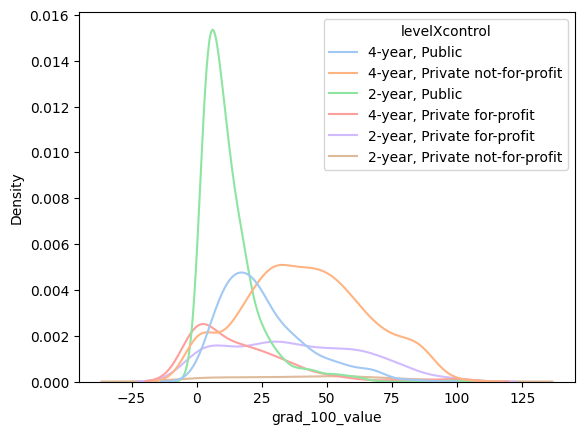

In [ ]:
cc['levelXcontrol']=cc['level']+', '+ cc['control']
sns.kdeplot(data=cc, x=cc['grad_100_value'], hue = cc['levelXcontrol'] , fill = False, palette = 'pastel')
#the 4-year private NFP institutions have the best graduation rates while the 2-year public ones have the worst

<Axes: xlabel='aid_value', ylabel='Density'>

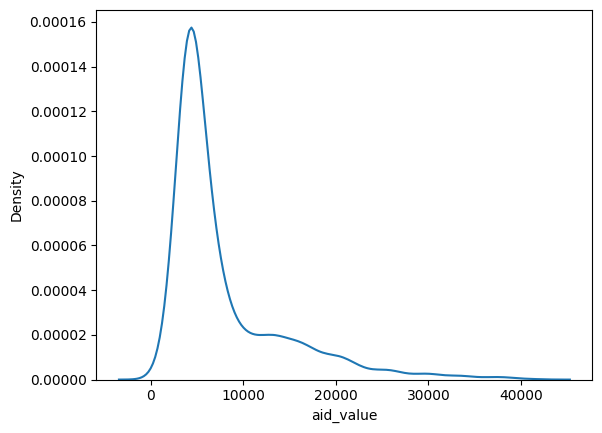

In [ ]:
sns.kdeplot(data=cc, x=cc['aid_value'])
#after making the other three following graphs, it becomes aparent that the second small peak is due to the high density of aid around $15000 in the
#4 year NFP institutions,

<Axes: xlabel='aid_value', ylabel='Density'>

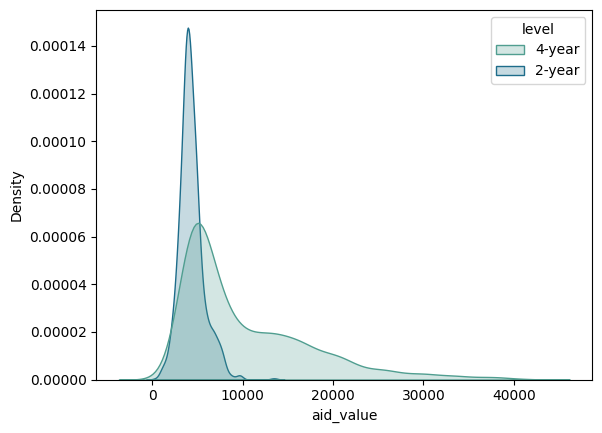

In [ ]:
sns.kdeplot(data=cc, x=cc['aid_value'], hue = cc['level'] , fill = True, palette = 'crest')

<Axes: xlabel='aid_value', ylabel='Density'>

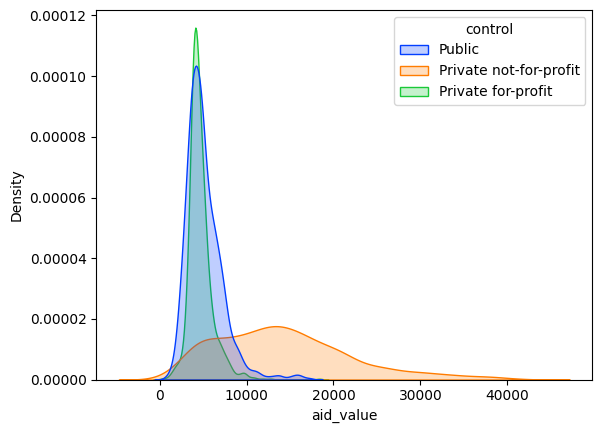

In [ ]:
sns.kdeplot(data=cc, x=cc['aid_value'], hue = cc['control'] , fill = True, palette = 'bright')

<Axes: xlabel='aid_value', ylabel='Density'>

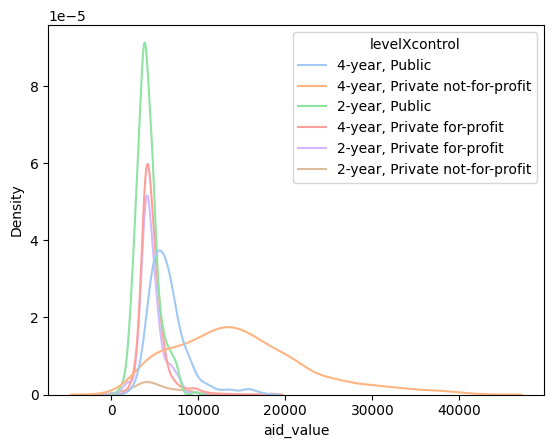

In [ ]:
sns.kdeplot(data=cc, x=cc['aid_value'], hue = cc['levelXcontrol'] , fill = False, palette = 'pastel')

In [ ]:
aidgroupL = cc['aid_value'].groupby(cc['level'])
aidgroupL.describe()

,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
2-year,1458.0,4310.878601,1384.045631,294.0,3485.5,4113.0,4890.0,13654.0
4-year,2339.0,10235.379222,7227.369167,902.0,4830.5,7222.0,14046.0,41580.0


In [ ]:
aidgroupC = cc['aid_value'].groupby(cc['control'])
aidgroupC.describe()

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,991.0,4632.206862,1399.121259,294.0,3861.50,4331.0,5131.5,18355.0
Private not-for-profit,1248.0,14180.722756,7772.700998,902.0,8325.00,13322.0,18571.0,41580.0
Public,1558.0,5094.835687,2136.436370,881.0,3725.25,4667.0,6087.5,17299.0


<Axes: xlabel='aid_value', ylabel='grad_100_value'>

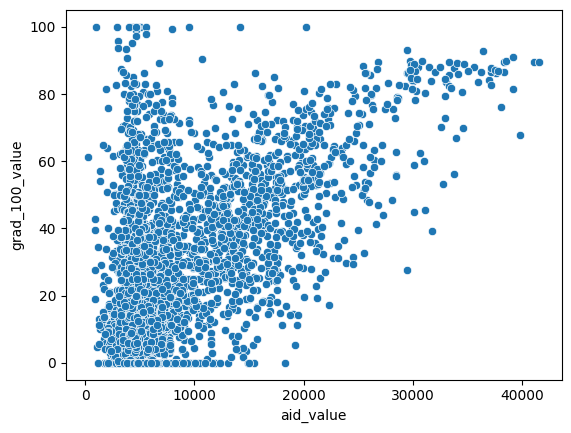

In [ ]:
sns.scatterplot(data=cc, x='aid_value',y='grad_100_value')
#it looks like there is somewhat of a positive correlation between the aid value and the graduation rates

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

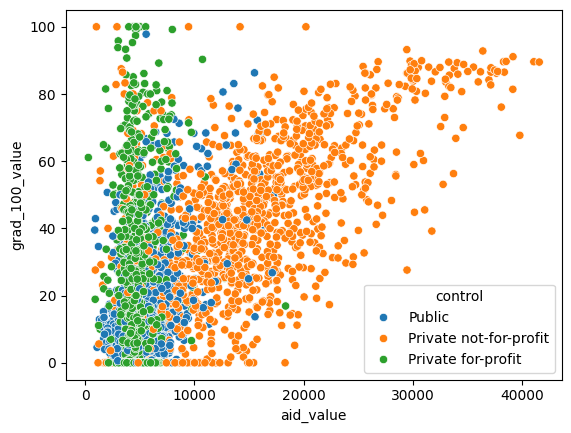

In [ ]:
sns.scatterplot(data=cc, x='aid_value',y='grad_100_value', hue = 'control')
#private NFP seem to give out the most aid, and they are correlated positively with graduation rates
#private FP seem to give the least aid
#public universities live less aid than private for profit, but it doesnt seem to have an obvious correlation

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

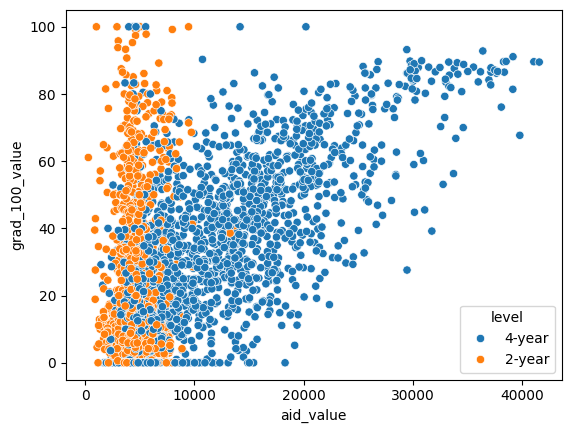

In [ ]:
sns.scatterplot(data=cc, x='aid_value',y='grad_100_value', hue = 'level')
#two-year universities have much lower aid in general, and for 4-year, there is a positive correlation between aid value and graduation rate

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

1. I am going to use a set of data called Specific Chronic Conditions which explores different conditions like alcohol abuse and heart disease.
2. It does not seem to explain how missing data are handled
3. I am going to clean Bene_Geo_Desc, Bene_Age_Lvl & Bene_Cond

4. NOTE -- I had to give up on the geography, it was really messy and I couldn't figure it out :(. Also, I find it really strange that there are an equal number of patients with each condition, but I can't think of a reason besides that it is not a randomly sampled data set
5.

I am really not sure what to make of this dataset, it doesn't look right to me, but I can't think of anything to fix it, there aren't really missing values...
- Maybe I am entirely missing something, but I am confused by it. It definitely caught my attention, but I'm kinda bummed because I thought I would be able to learn from this data and I was not able to figure out how.

In [111]:
scc = pd.read_csv('/content/CC_R20_P08_v10_D18_WWDSE_Cond.csv')
scc.head()

,Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc,Tot_Mdcr_Stdzd_Pymt_PC,Tot_Mdcr_Pymt_PC,Hosp_Readmsn_Rate,ER_Visits_Per_1000_Benes
0,State,Alabama,1.0,All,All,All,Alcohol Abuse,0.0188,25102.3405,23348.6039,0.2413,2184.7557
1,State,Alabama,1.0,65+,Dual Status,Medicare Only,Alcohol Abuse,0.0118,NaN,NaN,NaN,NaN
2,State,Alabama,1.0,<65,Dual Status,Medicare Only,Alcohol Abuse,0.0320,NaN,NaN,NaN,NaN
3,State,Alabama,1.0,All,Dual Status,Medicare Only,Alcohol Abuse,0.0147,NaN,NaN,NaN,NaN
4,State,Alabama,1.0,65+,Dual Status,Medicare and Medicaid,Alcohol Abuse,0.0238,NaN,NaN,NaN,NaN


In [82]:
local = scc['Bene_Geo_Desc'] # I just wanted to get a sense of the variable
print(local.describe(), '\n')
print( local.unique() , '\n')
print(local.value_counts())

count      236124
unique       3253
top       Alabama
freq          630
Name: Bene_Geo_Desc, dtype: object 

['Alabama' 'Alaska' 'Arizona' ... 'Wyoming : Unknown' 'Wyoming : Washakie'
 'Wyoming : Weston'] 

Alabama                 630
Nebraska                630
New Hampshire           630
New Jersey              630
New Mexico              630
                       ... 
Kentucky : Jefferson     63
Kentucky : Jessamine     63
Kentucky : Johnson       63
Kentucky : Kenton        63
Wyoming : Weston         63
Name: Bene_Geo_Desc, Length: 3253, dtype: int64


In [94]:
scc['Bene_Geo_Desc'] = scc['Bene_Geo_Desc'].replace(['Unknown'],np.nan) #I replaced the unknown values with np.nan


<Axes: ylabel='Bene_Geo_Desc'>

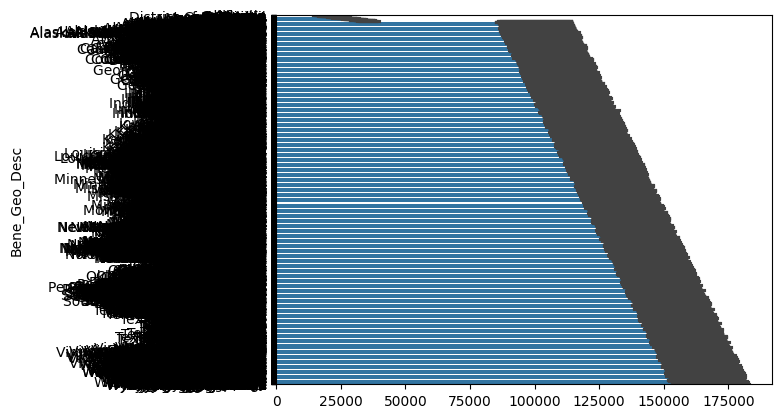

In [87]:
sns.barplot(data=scc['Bene_Geo_Desc']) #whoops this is horrendous, I didn't realize there were 3000+ different location
#I'm leaving this in because its funny, sorry!

In [112]:
print(scc['Bene_Age_Lvl'].describe(), '\n') #getting a feel for the breakdown
print(scc['Bene_Age_Lvl'].value_counts()) #there is the same exact for each type!!! this seems bad?


count     236124
unique         3
top          All
freq       78708
Name: Bene_Age_Lvl, dtype: object 

All    78708
65+    78708
<65    78708
Name: Bene_Age_Lvl, dtype: int64


<Axes: ylabel='Bene_Age_Lvl'>

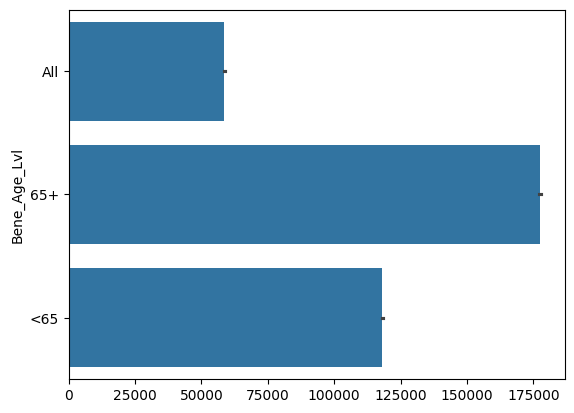

In [113]:
sns.barplot(data= scc['Bene_Age_Lvl']) #I am not sure why the value counts says theyre all the same when they are not?

In [114]:
scc['Bene_Age_Lvl'] = scc['Bene_Age_Lvl'].replace(['All'],np.nan) #remove the all option because it does not provide any info

<Axes: ylabel='Bene_Age_Lvl'>

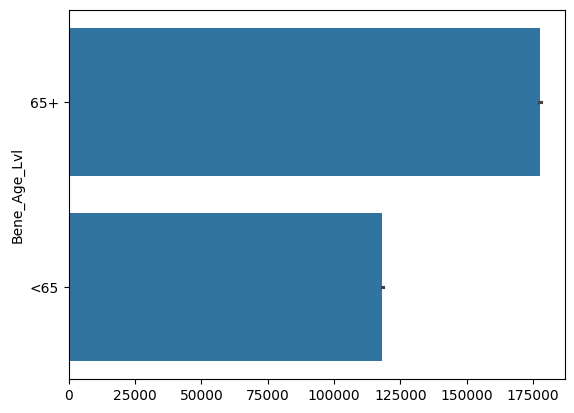

In [115]:
sns.barplot(data= scc['Bene_Age_Lvl'])#graphing it again after removing 'all", still different?

In [100]:
print(scc['Bene_Cond'].describe(), '\n')
print(scc['Bene_Cond'].value_counts())
#there are 21 different types of chronic condition being tracked by this dataset.
#it says the one with the highest frequence is alcohol abuse, but they all actually have the same amount

count            236124
unique               21
top       Alcohol Abuse
freq              11244
Name: Bene_Cond, dtype: object 

Alcohol Abuse                                  11244
Drug/Substance Abuse                           11244
Schizophrenia and Other Psychotic Disorders    11244
Osteoporosis                                   11244
Ischemic Heart Disease                         11244
Hypertension                                   11244
Hyperlipidemia                                 11244
Hepatitis (Chronic Viral B & C)                11244
Heart Failure                                  11244
HIV/AIDS                                       11244
Diabetes                                       11244
Alzheimer's Disease/Dementia                   11244
Depression                                     11244
Chronic Kidney Disease                         11244
Cancer                                         11244
COPD                                           11244
Autism Spectrum Disorde

<Axes: ylabel='Bene_Cond'>

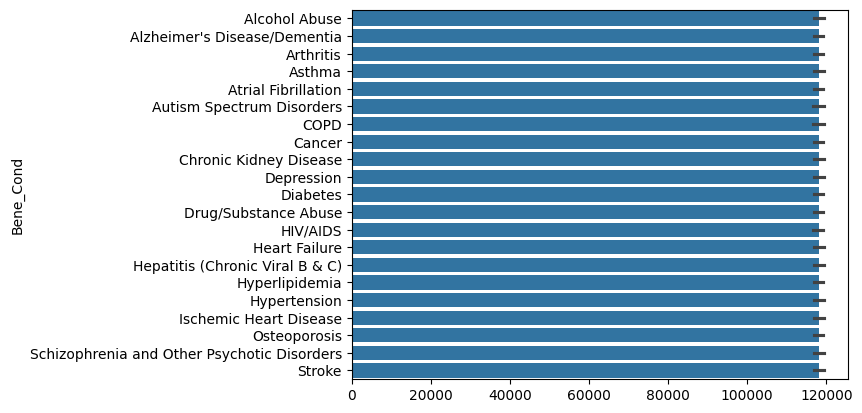

In [101]:
sns.barplot(data= scc['Bene_Cond'])

In [104]:
#sns.kdeplot(data=scc, x=scc['Bene_Cond'], hue = scc['Bene_Age_Lvl'] , fill = False, palette = 'pastel')

<Axes: xlabel='Bene_Cond', ylabel='Count'>

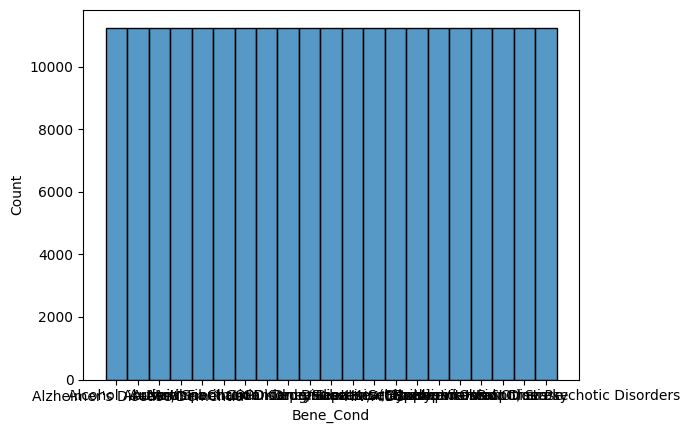

In [106]:
sns.histplot(data=scc, x=scc['Bene_Cond']) # this shows the exact same info as the bar graph but i can't read the labels

<Axes: xlabel='Prvlnc', ylabel='Hosp_Readmsn_Rate'>

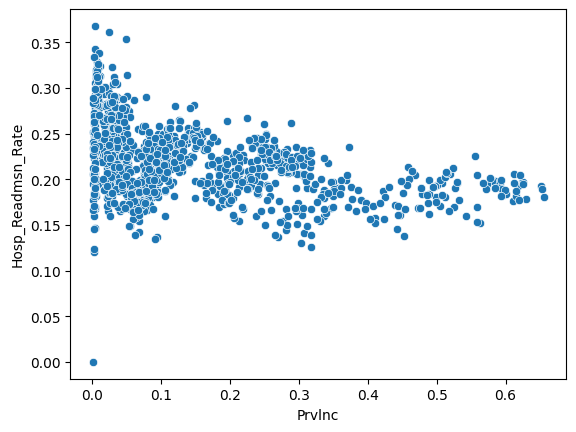

In [107]:
sns.scatterplot(data=scc, x= scc['Prvlnc'], y=scc['Hosp_Readmsn_Rate'])
# this scatterplot shows any possible trend between the prevelance of the disease and the hospital readmission rate
#there does not seem to be any correlation between the two since the slope is zero.
#that being said, it does look like the diseases with almost no prevalence end up in the hospital more often
#i wonder if that is because their treatments have to be more individualized, or maybe they have less specific regimines

In [108]:
pd.crosstab(scc['Bene_Cond'], scc['Bene_Age_Lvl'])
#once again this data just looks really weird, I dont really know what to make of it
#there are the exact same number of people in each age group for every single disease...
#I am kinda stumped, I don't know if I just didn't clean well or if the data is just not good/representative.

Bene_Age_Lvl,65+,<65
Bene_Cond,,
Alcohol Abuse,3748,3748
Alzheimer's Disease/Dementia,3748,3748
Arthritis,3748,3748
Asthma,3748,3748
Atrial Fibrillation,3748,3748
Autism Spectrum Disorders,3748,3748
COPD,3748,3748
Cancer,3748,3748
Chronic Kidney Disease,3748,3748
